## <center> Histopathological Cancer Detection

<h5>- Kranthi Kumar Valaboju

<p style='text-align: justify;'><b>Cancer</b> is the name given to a Collection of Related Diseases. In all types of Cancer's, some of the Body’s cells <b>Begin to Divide Without Stopping and Spread into Surrounding Tissues</b>.</p>

<p style='text-align: justify;'>When a surgeon operates to remove a <b>Primary Cancer</b>, one or more of the nearby (regional) <b>Lymph Nodes</b> may be removed as well. Removal of one lymph node is called a Biopsy. When many lymph nodes are removed, it’s called Lymph Node Sampling or Lymph Node Dissection. When cancer has spread to Lymph Nodes i.e known as <b>Metastatasis</b>, then there’s a <b>Higher Risk that the Cancer might come back after Surgery</b>.The tissue that’s removed is looked at under the microscope by a Pathologist for the Presence of Cancer Cells.<p>
    
<br>
<b>Lymph Nodes :</b>

<p style='text-align: justify;'>Lymph vessels route lymph fluid through nodes throughout the body. Lymph nodes are small structures that work as filters for harmful substances. They contain immune cells that can help fight infection by attacking and destroying germs that are carried in through the lymph fluid.</p>


<b>Metastatasis :</b>

<p style='text-align: justify;'> Metastasis is the spread of cancer cells to new areas of the body, often by way of the lymph system or bloodstream. A metastatic cancer, or metastatic tumor, is one that has spread from the primary site of origin, or where it started, into different areas of the body.</p>

<b>Histopathology</b>
<p style='text-align: justify;'> <b>Histology</b> is the study of <b>Tissues</b>, and <b>Pathology</b> is the study of <b>Disease</b>. So taken together, <b>Histopathology</b> literally means the <b>Study of Tissues as relates to Disease</b>. A histopathology report describes the tissue that has been sent for examination and the features of what the cancer looks like under the microscope. A histopathology report is sometimes called a biopsy report or a pathology report.</p>

<b>Digital Pathological Scans</b>

<p style='text-align: justify;'> Digital pathology is a sub-field of pathology that focuses on data management based on information generated from digitized specimen slides. Through the use of computer-based technology, digital pathology utilizes virtual microscopy. Glass slides are converted into digital slides that can be viewed, managed, shared and analyzed on a computer monitor. With the practice of Whole-Slide Imaging (WSI), which is another name for virtual microscopy, the field of digital pathology is growing and has applications in diagnostic medicine, with the goal of achieving efficient and cheaper diagnoses, prognosis, and prediction of diseases. </p>

### Data

<p style='text-align: justify;'>The Data here is from the Histopathological Scans. A positive label indicates that the center 32x32 px region of a patch contains at least one pixel of Tumor Tissue. Tumor tissue in the outer region of the patch does not influence the label. This outer region is provided to enable fully-convolutional models that do not use zero-padding, to ensure consistent behavior when applied to a Whole Slide Image(WSI).</p>

 - This Dataset was prepared on PCam (Patch Camelyon) which was prepared on Camelyon16 Data.
 - It is Smaller version of Camelyon16 Data. 
 - The Original PCam dataset contains duplicate images due to its Probabilistic Sampling, however, the version presented on Kaggle does not contain duplicates. 
 - The Data can be downloaded from https://www.kaggle.com/c/histopathologic-cancer-detection/data
 - <b>Files:</b>
     - Train : 5.87 GB
     - Test : 1.53 GB
     - Train_Labels: 9.02 MB
 - Train and Test Data consists only Images.

#### Useful Links

- https://en.wikipedia.org/wiki/Cancer 
- https://www.cancer.net/navigating-cancer-care/cancer-basics/what-metastasis
- https://www.cancer.gov/about-cancer/understanding/what-is-cancer
- https://en.wikipedia.org/wiki/Digital_pathology
- https://www.webmd.com/cancer/cancer-pathology-results#1
- https://www.verywellhealth.com/histopathology-2252152
- https://www.cancer.org/cancer/cancer-basics/lymph-nodes-and-cancer.html

### Problem Statement

 - To Detect the presence of Metastases (Tumour Tissue) in Pathological Scans Using Neural Networks with Best Possible Accuracy.

#### Type

 - Binary Image Classification Problem.

#### Challenges

 - Metastatic Cells or the Tumour Cells can be as small as a single cell in the Tissue.

### Objectives and Constraints

 - No Low Latency Constraints.
 - Prediction's have to be Very Accurate.
 - The False Negative Values should be as low as Possible.

### Performance Metrics

 - AUC Score
 - F1 Score
 - Recall Score

<p style='text-align: justify;'>Now here we are using <b>AUC</b> as our Key Metric. As, mentioned in Kaggle Challenge. But as in case of <b>Productionizing the Model</b>, the Key Preformance need to be considered is <b>Recall Score</b>, as the Patients with Tumour in the Tissue shouldn't be Predicted Wrong. This can be achieved only by having a Good Recall Score.</p>

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sb

from glob import glob 
import os
import shutil

from tqdm import tqdm_notebook as tqdm

import warnings
warnings.filterwarnings("ignore")
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score


import time
import datetime

import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, Flatten, MaxPooling2D, Dense, GlobalMaxPooling2D, GlobalAveragePooling2D, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,TensorBoard
from tensorflow.keras import backend as K
AT = tf.data.experimental.AUTOTUNE

In [ ]:
import os, sys
from PIL import Image
for infile in tqdm(ID):
    if infile[-3:] == "tif" or infile[-3:] == "bmp" :
        outfile = infile[:-3] + "jpeg"
        im = Image.open(infile)
        out = im.convert("RGB")
        out.save(outfile, "JPEG", quality=100)

In [209]:
import os, sys
from PIL import Image
for infile in tqdm(Test_Path):
    if infile[-3:] == "tif" or infile[-3:] == "bmp" :
        outfile = infile[:-3] + "jpeg"
        im = Image.open(infile)
        out = im.convert("RGB")
        out.save(outfile, "JPEG", quality=100)

### Reading Data

In [2]:
Labels=pd.read_csv("train_labels.csv")

In [3]:
print("Labels Shape : ",Labels.shape)

Labels Shape :  (220025, 2)


In [4]:
Labels.head(2)

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1


In [5]:
Train_Data_Dir = 'C:/Users/Kranthi/Python/Histopathological_Cancer_Detection_CS2/train/'
Data = pd.DataFrame({'path': glob(os.path.join(Train_Data_Dir,'*.jpeg'))})
Data['id'] = Data.path.map(lambda x: x.split('/')[5].split('.')[0])
Data['id'] = Data['id'].str[6:]
Data['path'] = Data['path'].str.replace('\\','/')
Data = Data.merge(Labels, on='id')

In [6]:
Data.head(2)

,path,id,label
0,C:/Users/Kranthi/Python/Histopathological_Canc...,00001b2b5609af42ab0ab276dd4cd41c3e7745b5,1
1,C:/Users/Kranthi/Python/Histopathological_Canc...,000020de2aa6193f4c160e398a8edea95b1da598,0


### EDA

#### Data Distribution

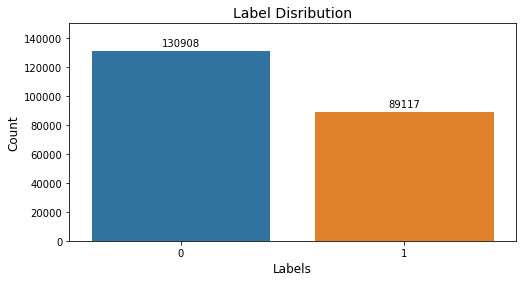

In [7]:
# Referred : https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies

fig = plt.figure(figsize = (8,4)) 
ax = sb.countplot(Data.label).set_title('Label Disribution', fontsize = 14)
plt.annotate(Data.label.value_counts()[0],
            xy = (0,Data.label.value_counts()[0] + 2000),
            va = 'bottom',
            ha = 'center',
            fontsize = 10)
plt.annotate(Data.label.value_counts()[1],
            xy = (1,Data.label.value_counts()[1] + 2000),
            va = 'bottom',
            ha = 'center',
            fontsize = 10)
plt.ylim(0,150000)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Labels', fontsize = 12)
plt.show()

In [8]:
Data['label'].value_counts()

0    130908
1     89117
Name: label, dtype: int64

In [9]:
print("% of Label 1 : {:.3f} %".format((Data['label'][Data['label']==1].count()/Data.shape[0])*100))
print("% of Label 0 : {:.3f} %".format((Data['label'][Data['label']==0].count()/Data.shape[0])*100))

% of Label 1 : 40.503 %
% of Label 0 : 59.497 %


 - It can be observered that the Data is Slightly Imbalanced.
 - Data is in 60:40 Ratio.
 - Negative Images are ~ 1.5 Times the Positive Images.

#### Visualizing The Data

#### Randomly Displaying Some Images From The Dataset

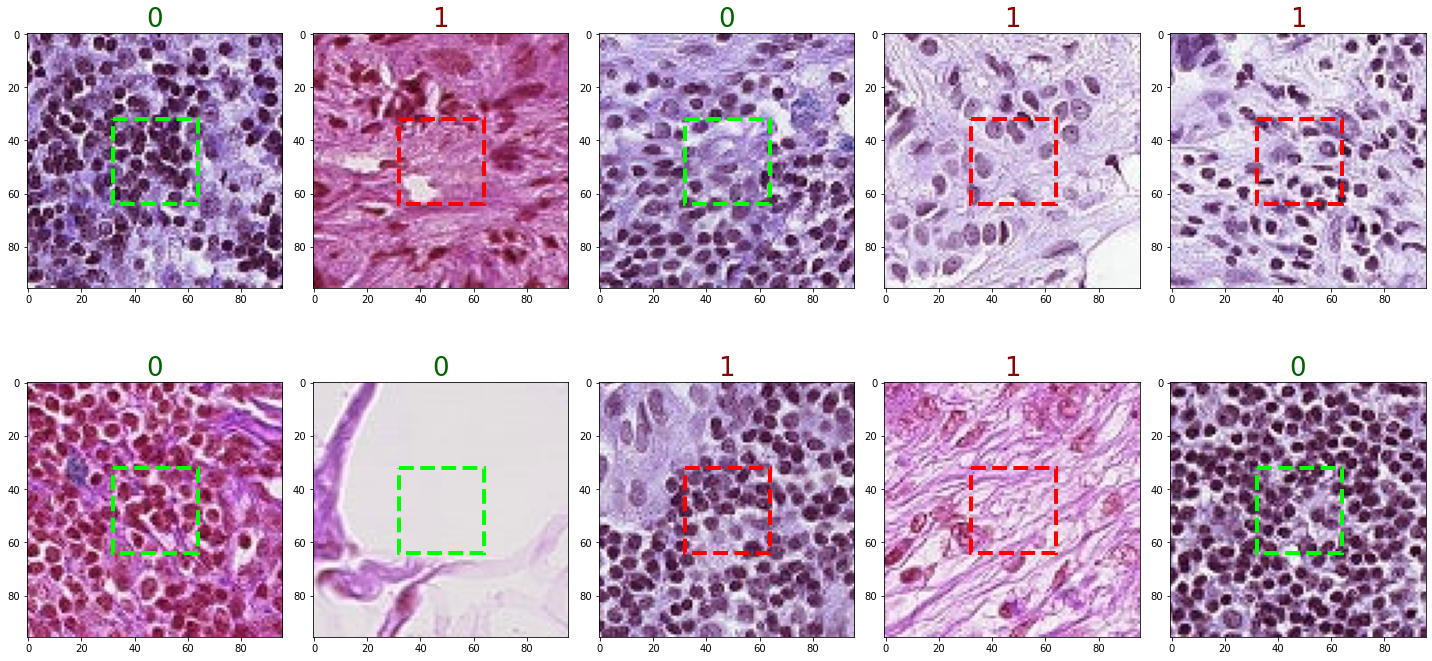

In [10]:
from matplotlib.patches import Polygon
fig = plt.figure(figsize = (20,10))
Plot_loc = 1
for i in np.random.randint(low = 0, high = Data.shape[0], size = 10):
    Image_Path = Train_Data_Dir + Data.iloc[i]['id'] + '.jpeg'
    img = cv2.imread(Image_Path)
    ax = fig.add_subplot(2, 5, Plot_loc)
    ax.imshow(img, cmap = 'gray')
    Plot_loc+= 1
    Color = ['darkred' if Data.iloc[i].label == 1 else 'darkgreen'][0]
    ax.set_title(Data.iloc[i].label, fontsize = 26, color = Color)
    if Data.iloc[i].label == 1:
        P = Polygon(((32, 32), (64, 32), (64, 64), (32, 64)),facecolor='None',edgecolor='red', lw=4, linestyle='--')
    else:
        P = Polygon(((32, 32), (64, 32), (64, 64), (32, 64)),facecolor='None',edgecolor='lime', lw=4, linestyle='--')
    ax.add_patch(P)
plt.tight_layout()
plt.show()

 - Classifying these images Directly with Normal Eye is very Difficult and it's almost Impossible.

#### Cleaning Data

 - Checking for the Images that are completely bright or Completely Dark. As, these images do not infer anything.

In [11]:
# Setting the Thresholds for Segregation

DImg_T=(10/255)
BImg_T=(245/255)

DImg=[]
BImg=[]

for idx in tqdm(Data['id']):
    
    path = os.path.join(Train_Data_Dir, idx)
    
    # Reading The Image
    bgr_img = cv2.imread(path + '.jpeg')
    
    # Splitting into Intensities
    b,g,r = cv2.split(bgr_img)
    rgb_img = cv2.merge([r,g,b])
    
    # Saving as Image Intensity Array
    Imarray = rgb_img / 255

    # Comparing With The Threshold Values
    if(Imarray.max() < DImg_T):
        DImg.append(idx)
        continue 
         
    elif(Imarray.min() > BImg_T):
        BImg.append(idx)
        continue 

In [12]:
print("Number of Images That are Too Dark : ",len(DImg))
print("Number of Images That are Too Bright : ",len(BImg))

Number of Images That are Too Dark :  1
Number of Images That are Too Bright :  6


#### Visualizing The Images That are Too Dark

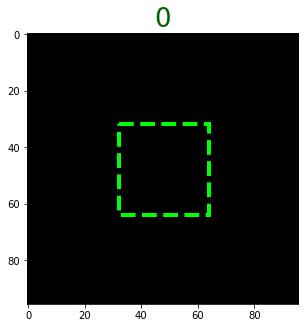

In [13]:
fig = plt.figure(figsize = (20,10))
Plot_loc = 1
for i in (DImg):
    Image_Path = os.path.join(Train_Data_Dir, i)
    img = cv2.imread(Image_Path + '.jpeg')
    ax = fig.add_subplot(2, 5, Plot_loc)
    ax.imshow(img, cmap = 'gray')
    Plot_loc+= 1
    Label_Img=int(Data['label'][Data['id']==i])
    if Label_Img:
        Color='darkred'
    else:
        Color='darkgreen'
    ax.set_title(Label_Img, fontsize = 26, color = Color)
    if Label_Img == 1:
        P = Polygon(((32, 32), (64, 32), (64, 64), (32, 64)),facecolor='None',edgecolor='red', lw=4, linestyle='--')
    else:
        P = Polygon(((32, 32), (64, 32), (64, 64), (32, 64)),facecolor='None',edgecolor='lime', lw=4, linestyle='--')
    ax.add_patch(P)
plt.tight_layout()
plt.show()

#### Visualizing The Images That are Too Bright

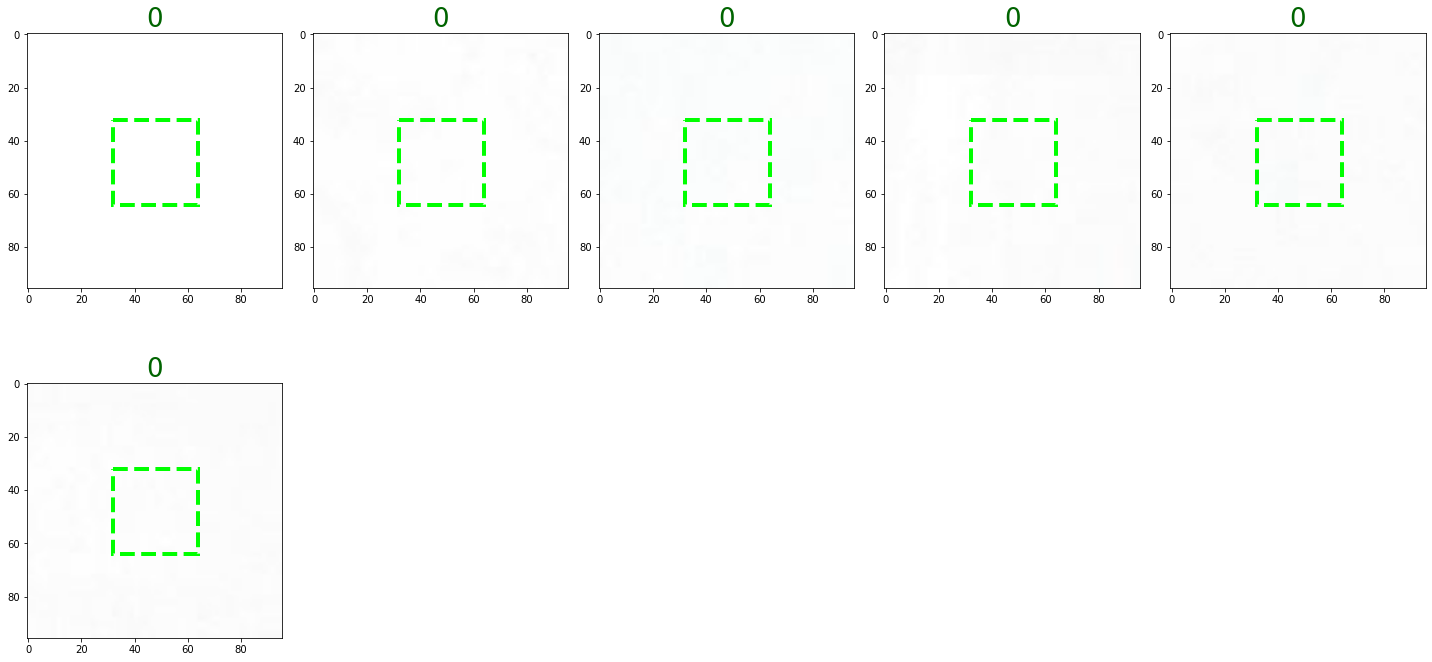

In [14]:
fig = plt.figure(figsize = (20,10))
Plot_loc = 1
for i in (BImg):
    Image_Path = os.path.join(Train_Data_Dir, i)
    img = cv2.imread(Image_Path + '.jpeg')
    ax = fig.add_subplot(2, 5, Plot_loc)
    ax.imshow(img, cmap = 'gray')
    Plot_loc+= 1
    Label_Img=int(Data['label'][Data['id']==i])
    if Label_Img:
        Color='darkred'
    else:
        Color='darkgreen'
    ax.set_title(Label_Img, fontsize = 26, color = Color)
    if Label_Img == 1:
        P = Polygon(((32, 32), (64, 32), (64, 64), (32, 64)),facecolor='None',edgecolor='red', lw=4, linestyle='--')
    else:
        P = Polygon(((32, 32), (64, 32), (64, 64), (32, 64)),facecolor='None',edgecolor='lime', lw=4, linestyle='--')
    ax.add_patch(P)
plt.tight_layout()
plt.show()

 - Dropping These Images, as they do not Infer anything 

In [15]:
for i in tqdm(DImg+BImg):
    Data=Data[Data['id'] != i]

In [16]:
print("Shape of Data After Removal of  Outlier's : ",Data.shape)

Shape of Data After Removal of  Outlier's :  (220018, 3)


### Splitting The Data

 - Here we are splitting the Data in the Ratio 90:10

In [17]:
ID = Data['path'].tolist()
Labels=Data['label'].tolist()

Train_D,Val_D,Label_D,Label_V=train_test_split(ID,Labels, test_size = 0.1, random_state = 42, stratify = Labels)

In [18]:
print("Shape of Training Data : ",len(Train_D))
print("Shape of Validation Data : ",len(Val_D))

Shape of Training Data :  198016
Shape of Validation Data :  22002


### Model Architecture

#### Input Data Pipeline Using tf.data

<b>Referred:</b>

 - https://cs230.stanford.edu/blog/datapipeline/
 - https://www.youtube.com/watch?v=uIcqeP7MFH0
 - https://www.tensorflow.org/api_docs/python/tf/data
 - https://www.youtube.com/watch?v=oFFbKogYdfc
 - https://www.wouterbulten.nl/blog/tech/data-augmentation-using-tensorflow-data-dataset/
 

In [19]:
Img_Size=96
Batch_Size = 64

In [20]:
# Parse Function

def _parse_fn(ImgFile, Label):
    Img_Path = tf.io.read_file(ImgFile)
    Img_Dec = tf.image.decode_jpeg(Img_Path)
    Img_Nor = (tf.cast(Img_Dec, tf.float32)/255)
    Final_Img = tf.image.resize(Img_Nor, (Img_Size, Img_Size))
    return Final_Img, Label

In [21]:
# Creating Dataset from slices of Image Path's and Labels Using tf.Data
T_Data = tf.data.Dataset.from_tensor_slices((tf.constant(Train_D), tf.constant(Label_D)))
V_Data=tf.data.Dataset.from_tensor_slices((tf.constant(Val_D), tf.constant(Label_V)))

# Parsing The Images to Pixel Values
T_Data=T_Data.map(_parse_fn,num_parallel_calls=AT)
V_Data=V_Data.map(_parse_fn,num_parallel_calls=AT)

# Batch the Images
T_Data=T_Data.batch(Batch_Size)
V_Data =V_Data.batch(Batch_Size)

# Prefetching Batch
T_Data=T_Data.prefetch(buffer_size=AT)
V_Data=V_Data.prefetch(buffer_size=AT)

#### Metric Function

In [22]:
# ROC-AUC Score
def AUC(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

#### Gradient Tape

#### Referred :
 - https://www.tensorflow.org/api_docs/python/tf/GradientTape
 - https://www.youtube.com/watch?v=T8AW0fKP0Hs
 - https://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/slides/lec10.pdf
 - https://en.wikipedia.org/wiki/Automatic_differentiation
 - https://www.pyimagesearch.com/2020/03/23/using-tensorflow-and-gradienttape-to-train-a-keras-model/
 - https://www.kite.com/python/docs/tensorflow.GradientTape

In [23]:
K.clear_session()
Init_LR=0.0001
loss = tf.keras.losses.BinaryCrossentropy()
optimizer = Adam(lr=Init_LR)
Opt_Adam =Adam(lr=Init_LR)

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.BinaryAccuracy(name='train_accuracy')

val_loss = tf.keras.metrics.Mean(name='val_loss')
val_accuracy = tf.keras.metrics.BinaryAccuracy(name='val_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.BinaryAccuracy(name='test_accuracy')

### CNN Based Model

#### Modeling

In [25]:
class MP2(tf.keras.layers.Layer):   
    def __init__(self):
        super(MP2,self).__init__()
        self.MP=tf.keras.layers.MaxPool2D(2)              
    def call(self,inputs):
        return self.MP(inputs)
    
class Dr_Den(tf.keras.layers.Layer):
    def __init__(self,rate,**kwargs):
        super(Dr_Den,self).__init__(**kwargs)
        self.rate=rate
        self.Dens=tf.keras.layers.Dense(1,activation='sigmoid')
    def call(self,inputs):
        lay= tf.nn.dropout(inputs,rate=self.rate)
        lay= self.Dens(lay)
        return lay   

class CNNModel(tf.keras.Model):
    def __init__(self,rate,**kwargs):
        super(CNNModel,self).__init__()
        self.conv2D1 = tf.keras.layers.Conv2D(16,kernel_size=3, input_shape=(None,Img_Size,Img_Size,3),activation='relu') 
        self.Flat=tf.keras.layers.Flatten()
        self.MP2D=MP2()
        self.rate=rate
        self.Dens=Dr_Den(rate)
        
    def call(self, inputs, **kwargs):
        model=self.conv2D1(inputs)
        model=self.MP2D(model)
        model=self.Flat(model)
        model=self.Dens(model)
        return model

In [55]:
def HCDModelGTCNN(Epochs,checkpoint,manager,File_Name,modelc):
    
    start_time=time.clock()
    
    print("\nInitializing Parameters . . .")


    train_loss_results = []
    train_accuracy_results = []

    val_loss_results = []
    val_accuracy_results = []
    
    train_auc=[]
    val_auc=[]
   
    iepoch=0
    T_step=0
    V_step=0
    
    # Defining GradientTape
    
    @tf.function
    def GT(modelc,X_batch,Y_batch):    
        with tf.GradientTape() as tape:
            Y_Pred=modelc(X_batch, training=True)
            loss_values=loss(Y_batch, Y_Pred)
            gradients=tape.gradient(loss_values, modelc.trainable_weights)
            Opt_Adam.apply_gradients(zip(gradients, modelc.trainable_weights))
        
            return loss_values,Y_Pred
    
    # Initializing the Identifiers
    
    train_log_dir = 'logs/GT/HCD_D169_' + File_Name + '/train'
    val_log_dir = 'logs/GT/HCD_D169_' + File_Name + '/val'
    summary_writer = tf.summary.create_file_writer(train_log_dir)
    #val_summary_writer = tf.summary.create_file_writer(val_log_dir)
    save_path='ModelsGT/HCD_D169_' + File_Name
    
    # Training the Model
    
    print("\nTraining the Model . . .")
    print("\nChecking for the Checkpoint Files . . .")
    
    # Checking for the Checkpoints
    checkpoint.restore(manager.latest_checkpoint)
    if manager.latest_checkpoint:
        print("\nFound . .  !\nRestoring . . ")
        print("\nRestored from {}".format(manager.latest_checkpoint))
        ind=manager.latest_checkpoint.find("ckpt")
        iepoch=int(manager.latest_checkpoint[(ind+5):])
        print("\nTraining from Epoch {}".format(int(iepoch)+1))
        T_step=iepoch*(len(Train_D)//Batch_Size)
        V_step=iepoch*(len(Val_D)//Batch_Size)
    else:
        print("\nNot Found . . !")
        print("\nTraining the Model From Scratch . . .")
    
    Epochs=Epochs+int(iepoch)
    for epoch in range(int(iepoch),Epochs):
       
        print("\nEpoch {}/{}".format(epoch+1, Epochs))
        print("[", end ="")
        c=0
        # for loop iterate over batches
        for (X_batch, y_batch) in (T_Data):
        
            if c%50==0:
                print("=",end="")
        
            # GradientTape
            loss_values,y_pred=GT(modelc,X_batch,y_batch)

            train_loss(loss_values)
            train_accuracy(y_batch, y_pred)
            train_AUC=AUC(y_batch,y_pred)
            

            train_loss_results.append(loss_values)
            train_accuracy_results.append(train_accuracy.result())
            train_auc.append(train_AUC)
            
            c+=1
            #train_accuracy.reset_states
            T_step+=1
        # Tensorboard Summary Writer    
            with summary_writer.as_default():
                tf.summary.scalar(f'Step Loss/Train', loss_values, step=T_step)
                tf.summary.scalar(f'Step Accuracy/Train', train_accuracy.result(), step=T_step)
                tf.summary.scalar('Step AUC/Train', train_AUC, step=T_step)
                
        with summary_writer.as_default():
            tf.summary.scalar(f'Epoch Loss/Train', loss_values, step=epoch+1)
            tf.summary.scalar(f'Epoch Accuracy/Train', train_accuracy.result(), step=epoch+1)
            tf.summary.scalar(f'Epoch AUC/Train', train_AUC, step=epoch+1)
            
        # For Loop Iterating ove Validation Data Batches
        for (X_batch, y_batch) in (V_Data):
        
            if c%50==0:
                print("=",end="")

            # GradientTape
            val_loss_values,y_pred=GT(modelc,X_batch,y_batch)

            val_loss(val_loss_values)
            val_accuracy(y_batch, y_pred)
            val_AUC=AUC(y_batch,y_pred)


            val_loss_results.append(val_loss_values)
            val_accuracy_results.append(val_accuracy.result())
            val_auc.append(val_AUC)
            
            c+=1
            #val_accuracy.reset_states
            V_step+=1
        # Tensorboard Summary Writer
            with summary_writer.as_default():
                tf.summary.scalar(f'Step Loss/Validation', val_loss_values, step=V_step)
                tf.summary.scalar(f'Step Accuracy/Validation', val_accuracy.result(), step=V_step)
                tf.summary.scalar(f'Step AUC/Validation', val_AUC, step=V_step)
        with summary_writer.as_default():
            tf.summary.scalar(f'Epoch Loss/Validation', val_loss_values, step=epoch+1)
            tf.summary.scalar(f'Epoch Accuracy/Validation', val_accuracy.result(), step=epoch+1)
            tf.summary.scalar(f'Epoch AUC/Validation', val_AUC, step=epoch+1)
            
        # Creating Checkpoint using tf.train.Checkpoint
        checkpoint = tf.train.Checkpoint(optimizer=Opt_Adam, model=modelc)
        print("]")
        Epoch_Stats = 'Training loss: {:.4f}, Training accuracy: {:.4f}, Train AUC: {:.4f} Validation loss: {:.4f}, Validation accuracy: {:.4f}, Validation AUC: {:.4f}'
        print(Epoch_Stats.format(loss_values,train_accuracy.result() * 100,train_AUC,val_loss_values,val_accuracy.result()*100,val_AUC))
    
        Checkpoint_save_path = manager.save()
        print("Saved Checkpoint for Epoch {}: {}".format(epoch+1, Checkpoint_save_path))
    #checkpoint.save(checkpoint_path+'/')
    z=modelc.predict(V_Data)
    # Saving the Model using tf.saved_model
    tf.saved_model.save(modelc,save_path+'/')
    
    # Displaying Information related to this run
    print("\n\nCorresponding Files to this Run : ")
    print("\nTensorBoard Log Files : logs/GT/HCD_D169_{}".format(File_Name))
    print("\nCheckpoint Files : CheckponitsGT/{}".format(File_Name))
    print("\nModel Files : {}".format(save_path))
        
    print("\n\nTime Taken For This Process : "+ str((time.clock()-start_time)) + " Sec")

In [56]:
def HCD_CNN(Init_LR,Dropout_Rate,Inp_Shape,Epochs,File_Name):
    
    # Initializing Optimizer
    
    print("\nInitializing Optimizer . . .")
    Opt_Adam =Adam(lr=Init_LR)
    
    # Building Model
    print("\nBuilding Model . . .")
    modelx = CNNModel(rate=Dropout_Rate)
    modelx.build(input_shape=(None, Inp_Shape,Inp_Shape,3))
    
    # Creating Checkpoint Objects
    checkpoint = tf.train.Checkpoint(optimizer=Opt_Adam,model=modelx)
    manager = tf.train.CheckpointManager(checkpoint, 'CheckponitsGT/HCD_D169_' + File_Name, max_to_keep=None)
    
    # Calling the Training Module
    K.clear_session()
    HCDModelGTCNN(Epochs=Epochs,checkpoint=checkpoint,manager=manager,File_Name=File_Name,modelc=modelx)

#### Model Using Dropout_Rate=0.5, Learning Rate=0.0001 and Epochs=7

In [57]:
Model_Name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
HCD_CNN(Init_LR=0.0001,Dropout_Rate=0.5,Inp_Shape=96,Epochs=2,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Not Found . . !

Training the Model From Scratch . . .

Epoch 1/2
[=====================================================================]
Training loss: 0.3357, Training accuracy: 78.8467, Train AUC: 0.9340 Validation loss: 0.3793, Validation accuracy: 80.0754, Validation AUC: 0.9231
Saved Checkpoint for Epoch 1: CheckponitsGT/HCD_D169_20200611-100321\ckpt-1

Epoch 2/2
[=====================================================================]
Training loss: 0.3286, Training accuracy: 78.9330, Train AUC: 0.9297 Validation loss: 0.3898, Validation accuracy: 80.1238, Validation AUC: 0.9087
Saved Checkpoint for Epoch 2: CheckponitsGT/HCD_D169_20200611-100321\ckpt-2
INFO:tensorflow:Assets written to: ModelsGT/HCD_D169_20200611-100321/assets


Corresponding Files to this Run : 

TensorBoard Log Files : logs/GT/HCD_D169_20200611-100321

Checkpoint

In [58]:
HCD_CNN(Init_LR=0.0001,Dropout_Rate=0.5,Inp_Shape=96,Epochs=2,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Found . .  !
Restoring . . 

Restored from CheckponitsGT/HCD_D169_20200611-100321\ckpt-2

Training from Epoch 3

Epoch 3/4
[=====================================================================]
Training loss: 0.3295, Training accuracy: 79.0304, Train AUC: 0.9286 Validation loss: 0.3566, Validation accuracy: 80.1932, Validation AUC: 0.9327
Saved Checkpoint for Epoch 3: CheckponitsGT/HCD_D169_20200611-100321\ckpt-3

Epoch 4/4
[=====================================================================]
Training loss: 0.3145, Training accuracy: 79.1349, Train AUC: 0.9340 Validation loss: 0.3760, Validation accuracy: 80.2613, Validation AUC: 0.9183
Saved Checkpoint for Epoch 4: CheckponitsGT/HCD_D169_20200611-100321\ckpt-4
INFO:tensorflow:Assets written to: ModelsGT/HCD_D169_20200611-100321/assets


Corresponding Files to this Run : 

TensorBoard

#### Tensorboard Log Files

<img src="TBM/1.png">

<img src="TBM/2.png">

<img src="TBM/3.png">

#### Model Using Dropout_Rate=0.4, Learning Rate=0.0001 and Epochs=10

In [59]:
Model_Name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
HCD_CNN(Init_LR=0.0001,Dropout_Rate=0.4,Inp_Shape=96,Epochs=6,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Not Found . . !

Training the Model From Scratch . . .

Epoch 1/6
[=====================================================================]
Training loss: 0.3308, Training accuracy: 79.0734, Train AUC: 0.9535 Validation loss: 0.4089, Validation accuracy: 80.2279, Validation AUC: 0.9103
Saved Checkpoint for Epoch 1: CheckponitsGT/HCD_D169_20200611-104435\ckpt-1

Epoch 2/6
[=====================================================================]
Training loss: 0.3368, Training accuracy: 79.0924, Train AUC: 0.9351 Validation loss: 0.3855, Validation accuracy: 80.2273, Validation AUC: 0.9183
Saved Checkpoint for Epoch 2: CheckponitsGT/HCD_D169_20200611-104435\ckpt-2

Epoch 3/6
[=====================================================================]
Training loss: 0.3306, Training accuracy: 79.1353, Train AUC: 0.9351 Validation loss: 0.3969, Valid

In [60]:
HCD_CNN(Init_LR=0.0001,Dropout_Rate=0.4,Inp_Shape=96,Epochs=4,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Found . .  !
Restoring . . 

Restored from CheckponitsGT/HCD_D169_20200611-104435\ckpt-6

Training from Epoch 7

Epoch 7/10
[=====================================================================]
Training loss: 0.3132, Training accuracy: 79.4181, Train AUC: 0.9437 Validation loss: 0.3678, Validation accuracy: 80.4766, Validation AUC: 0.9167
Saved Checkpoint for Epoch 7: CheckponitsGT/HCD_D169_20200611-104435\ckpt-7

Epoch 8/10
[=====================================================================]
Training loss: 0.3216, Training accuracy: 79.5037, Train AUC: 0.9351 Validation loss: 0.3884, Validation accuracy: 80.5430, Validation AUC: 0.9135
Saved Checkpoint for Epoch 8: CheckponitsGT/HCD_D169_20200611-104435\ckpt-8

Epoch 9/10
[=====================================================================]
Training loss: 0.3091, Training accurac

#### TensorBoard Log Files

<img src="TBM/4.png">

<img src="TBM/5.png">

<img src="TBM/6.png">

### Image Augmentation

<b>Referred : </b>

 - https://www.tensorflow.org/tutorials/images/data_augmentation
 - https://www.wouterbulten.nl/blog/tech/data-augmentation-using-tensorflow-data-dataset/
 - https://androidkt.com/tensorflow-image-augmentation-using-tf-image/

#### Applying Random Image Augmentation Techniques

In [61]:
def Augmen_TF(Img, Label):
    
    Img = tf.image.random_flip_left_right(Img)
    Img = tf.image.random_brightness(Img, max_delta=32.0 / 255.0)
    Img = tf.image.random_saturation(Img, lower=0.5, upper=1.5)
    return Img, Label

In [62]:
# Creating Dataset from slices of Image Path's and Labels Using tf.Data
AT_Data = tf.data.Dataset.from_tensor_slices((tf.constant(Train_D), tf.constant(Label_D)))
AV_Data=tf.data.Dataset.from_tensor_slices((tf.constant(Val_D), tf.constant(Label_V)))

# Parsing The Images to Pixel Values
AT_Data=AT_Data.map(_parse_fn,num_parallel_calls=AT)
AV_Data=AV_Data.map(_parse_fn,num_parallel_calls=AT)

# Applying Augmentation Techniques
AT_Data=AT_Data.map(Augmen_TF,num_parallel_calls=AT)
AV_Data=AV_Data.map(Augmen_TF,num_parallel_calls=AT)

# Batch the Images
AT_Data=AT_Data.batch(Batch_Size)
AV_Data=AV_Data.batch(Batch_Size)

# Prefetching Batch
AT_Data=AT_Data.prefetch(buffer_size=AT)
AV_Data=AV_Data.prefetch(buffer_size=AT)

In [101]:
def HCDModelGTACNN(Epochs,checkpoint,manager,File_Name,modelc):
    
    start_time=time.clock()
    
    print("\nInitializing Parameters . . .")


    train_loss_results = []
    train_accuracy_results = []

    val_loss_results = []
    val_accuracy_results = []
    
    train_auc=[]
    val_auc=[]
    
    iepoch=0
    T_step=0
    V_step=0
    
    # Defining GradientTape
    
    @tf.function
    def GT(modelc,X_batch,Y_batch):    
        with tf.GradientTape() as tape:
            Y_Pred=modelc(X_batch, training=True)
            loss_values=loss(Y_batch, Y_Pred)
            gradients=tape.gradient(loss_values, modelc.trainable_weights)
            Opt_Adam.apply_gradients(zip(gradients, modelc.trainable_weights))
        
            return loss_values,Y_Pred
    
    # Initializing the Identifiers
    
    train_log_dir = 'logs/GT/HCD_D169_' + File_Name + '/train'
    summary_writer = tf.summary.create_file_writer(train_log_dir)
    save_path='ModelsGT/HCD_D169_' + File_Name
    
    # Training the Model
    
    print("\nTraining the Model . . .")
    print("\nChecking for the Checkpoint Files . . .")
    
    # Checking for the Checkpoints
    checkpoint.restore(manager.latest_checkpoint)
    if manager.latest_checkpoint:
        print("\nFound . .  !\nRestoring . . ")
        print("\nRestored from {}".format(manager.latest_checkpoint))
        ind=manager.latest_checkpoint.find("ckpt")
        iepoch=int(manager.latest_checkpoint[(ind+5):])
        print("\nTraining from Epoch {}".format(int(iepoch)+1))
        T_step=iepoch*(len(Train_D)//Batch_Size)
        V_step=iepoch*(len(Val_D)//Batch_Size)
    else:
        print("\nNot Found . . !")
        print("\nTraining the Model From Scratch . . .")
    
    Epochs=Epochs+int(iepoch)
    for epoch in range(int(iepoch),Epochs):

        print("\nEpoch {}/{}".format(epoch+1, Epochs))
        print("[", end ="")
        c=0
        # for loop iterate over batches
        for (X_batch, y_batch) in (AT_Data):
        
            if c%50==0:
                print("=",end="")
        
            # GradientTape
            loss_values,y_pred=GT(modelc,X_batch,y_batch)

            train_loss(loss_values)
            train_accuracy(y_batch, y_pred)
            train_AUC=AUC(y_batch,y_pred)
            

            train_loss_results.append(loss_values)
            train_accuracy_results.append(train_accuracy.result())
            train_auc.append(train_AUC)
            
            c+=1
            T_step+=1
            #train_accuracy.reset_states
            with summary_writer.as_default():
                tf.summary.scalar(f'Step Loss/Train', loss_values, step=T_step)
                tf.summary.scalar(f'Step Accuracy/Train', train_accuracy.result(), step=T_step)
                tf.summary.scalar(f'Step AUC/Train', train_AUC, step=T_step)
        # Tensorboard Summary Writer    
        with summary_writer.as_default():
            tf.summary.scalar(f'Epoch Loss/Train', loss_values, step=epoch)
            tf.summary.scalar(f'Epoch Accuracy/Train', train_accuracy.result(), step=epoch+1)
            tf.summary.scalar(f'Epoch AUC/Train', train_AUC, step=epoch+1)
        
        # For Loop Iterating ove Validation Data Batches
        for (X_batch, y_batch) in (AV_Data):
        
            if c%50==0:
                print("=",end="")

            # GradientTape
            val_loss_values,y_pred=GT(modelc,X_batch,y_batch)

            val_loss(val_loss_values)
            val_accuracy(y_batch, y_pred)
            val_AUC=AUC(y_batch,y_pred)


            val_loss_results.append(val_loss_values)
            val_accuracy_results.append(val_accuracy.result())
            val_auc.append(val_AUC)
            
            c+=1
            V_step+=1
            #val_accuracy.reset_states
            with summary_writer.as_default():
                tf.summary.scalar(f'Step Loss/Validation', val_loss_values, step=V_step)
                tf.summary.scalar(f'Step Accuracy/Validation', val_accuracy.result(), step=V_step)
                tf.summary.scalar(f'Step AUC/Validation', val_AUC, step=V_step)
        
        # Tensorboard Summary Writer
        with summary_writer.as_default():
            tf.summary.scalar(f'Epoch Loss/Validation', val_loss_values, step=epoch+1)
            tf.summary.scalar(f'Epoch Accuracy/Validation', val_accuracy.result(), step=epoch+1)
            tf.summary.scalar(f'Epoch AUC/Validation', val_AUC, step=epoch+1)

        # Creating Checkpoint using tf.train.Checkpoint
        checkpoint = tf.train.Checkpoint(optimizer=Opt_Adam, model=modelc)
        print("]")
        Epoch_Stats = 'Training loss: {:.4f}, Training accuracy: {:.4f}, Train AUC: {:.4f} Validation loss: {:.4f}, Validation accuracy: {:.4f}, Validation AUC: {:.4f}'
        print(Epoch_Stats.format(loss_values,train_accuracy.result() * 100,train_AUC,val_loss_values,val_accuracy.result()*100,val_AUC))
    
        Checkpoint_save_path = manager.save()
        print("Saved Checkpoint for Epoch {}: {}".format(epoch+1, Checkpoint_save_path))
    #checkpoint.save(checkpoint_path+'/')
    z=modelc.predict(V_Data)
    # Saving the Model using tf.saved_model
    tf.saved_model.save(modelc,save_path+'/')
    
    # Displaying Information related to this run
    print("\n\nCorresponding Files to this Run : ")
    print("\nTensorBoard Log Files : logs/GT/HCD_D169_{}".format(File_Name))
    print("\nCheckpoint Files : CheckponitsGT/{}".format(File_Name))
    print("\nModel Files : {}".format(save_path))
        
    print("\n\nTime Taken For This Process : "+ str((time.clock()-start_time)) + " Sec")

In [102]:
def HCD_CNNA(Init_LR,Dropout_Rate,Inp_Shape,Epochs,File_Name):
    
    # Initializing Optimizer
    
    print("\nInitializing Optimizer . . .")
    Opt_Adam =Adam(lr=Init_LR)
    
    # Building Model
    print("\nBuilding Model . . .")
    modelx = CNNModel(rate=Dropout_Rate)
    modelx.build(input_shape=(None, Inp_Shape,Inp_Shape,3))
    
    # Creating Checkpoint Objects
    checkpoint = tf.train.Checkpoint(optimizer=Opt_Adam,model=modelx)
    manager = tf.train.CheckpointManager(checkpoint, 'CheckponitsGT/HCD_D169_' + File_Name, max_to_keep=None)
    
    # Calling the Training Module
    K.clear_session()
    HCDModelGTACNN(Epochs=Epochs,checkpoint=checkpoint,manager=manager,File_Name=File_Name,modelc=modelx)

#### Model Using Dropout_Rate=0.5, Learning Rate=0.001, Epochs=5 and Random Image Augmentation Techniques

In [103]:
K.clear_session()
Model_Name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
HCD_CNNA(Init_LR=0.001,Dropout_Rate=0.5,Inp_Shape=96,Epochs=4,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Not Found . . !

Training the Model From Scratch . . .

Epoch 1/4
[=====================================================================]
Training loss: 0.3535, Training accuracy: 86.2698, Train AUC: 0.9372 Validation loss: 0.4125, Validation accuracy: 87.0976, Validation AUC: 0.9103
Saved Checkpoint for Epoch 1: CheckponitsGT/HCD_D169_20200613-093513\ckpt-1

Epoch 2/4
[=====================================================================]
Training loss: 0.3389, Training accuracy: 86.2220, Train AUC: 0.9361 Validation loss: 0.3874, Validation accuracy: 87.0486, Validation AUC: 0.9263
Saved Checkpoint for Epoch 2: CheckponitsGT/HCD_D169_20200613-093513\ckpt-2

Epoch 3/4
[=====================================================================]
Training loss: 0.3351, Training accuracy: 86.1789, Train AUC: 0.9340 Validation loss: 0.3769, Valid

In [104]:
HCD_CNNA(Init_LR=0.001,Dropout_Rate=0.5,Inp_Shape=96,Epochs=1,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Found . .  !
Restoring . . 

Restored from CheckponitsGT/HCD_D169_20200613-093513\ckpt-4

Training from Epoch 5

Epoch 5/5
[=====================================================================]
Training loss: 0.2831, Training accuracy: 86.1027, Train AUC: 0.9740 Validation loss: 0.3711, Validation accuracy: 86.9230, Validation AUC: 0.9359
Saved Checkpoint for Epoch 5: CheckponitsGT/HCD_D169_20200613-093513\ckpt-5
INFO:tensorflow:Assets written to: ModelsGT/HCD_D169_20200613-093513/assets


Corresponding Files to this Run : 

TensorBoard Log Files : logs/GT/HCD_D169_20200613-093513

Checkpoint Files : CheckponitsGT/20200613-093513

Model Files : ModelsGT/HCD_D169_20200613-093513


Time Taken For This Process : 829.4524774000165 Sec


#### TensorBoard Files

<img src="TBM/7.png">

<img src="TBM/8.png">

<img src="TBM/9.png">

#### Model Using Dropout_Rate=0.5, Learning Rate=0.0001, Epochs=10 and Random Image Augmentation Techniques

In [105]:
K.clear_session()
Model_Name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
HCD_CNNA(Init_LR=0.0001,Dropout_Rate=0.5,Inp_Shape=96,Epochs=7,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Not Found . . !

Training the Model From Scratch . . .

Epoch 1/7
[=====================================================================]
Training loss: 0.3109, Training accuracy: 86.0445, Train AUC: 0.9654 Validation loss: 0.3808, Validation accuracy: 86.8692, Validation AUC: 0.9279
Saved Checkpoint for Epoch 1: CheckponitsGT/HCD_D169_20200613-111815\ckpt-1

Epoch 2/7
[=====================================================================]
Training loss: 0.3230, Training accuracy: 85.9970, Train AUC: 0.9416 Validation loss: 0.3853, Validation accuracy: 86.8192, Validation AUC: 0.9183
Saved Checkpoint for Epoch 2: CheckponitsGT/HCD_D169_20200613-111815\ckpt-2

Epoch 3/7
[=====================================================================]
Training loss: 0.3109, Training accuracy: 85.9524, Train AUC: 0.9524 Validation loss: 0.3906, Valid

In [106]:
HCD_CNNA(Init_LR=0.0001,Dropout_Rate=0.5,Inp_Shape=96,Epochs=3,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Found . .  !
Restoring . . 

Restored from CheckponitsGT/HCD_D169_20200613-111815\ckpt-7

Training from Epoch 8

Epoch 8/10
[=====================================================================]
Training loss: 0.3004, Training accuracy: 85.7826, Train AUC: 0.9535 Validation loss: 0.3553, Validation accuracy: 86.5928, Validation AUC: 0.9199
Saved Checkpoint for Epoch 8: CheckponitsGT/HCD_D169_20200613-111815\ckpt-8

Epoch 9/10
[=====================================================================]
Training loss: 0.3018, Training accuracy: 85.7605, Train AUC: 0.9567 Validation loss: 0.3483, Validation accuracy: 86.5681, Validation AUC: 0.9311
Saved Checkpoint for Epoch 9: CheckponitsGT/HCD_D169_20200613-111815\ckpt-9

Epoch 10/10
[=====================================================================]
Training loss: 0.2778, Training accura

#### TensorBoard Log FIles

<img src="TBM/10.png">

<img src="TBM/11.png">

<img src="TBM/12.png">

#### Model Using Dropout_Rate=0.4, Learning Rate=0.0001, Epochs=10 and Random Image Augmentation Techniques

In [107]:
K.clear_session()
Model_Name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
HCD_CNNA(Init_LR=0.0001,Dropout_Rate=0.4,Inp_Shape=96,Epochs=6,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Not Found . . !

Training the Model From Scratch . . .

Epoch 1/6
[=====================================================================]
Training loss: 0.3180, Training accuracy: 85.6989, Train AUC: 0.9589 Validation loss: 0.3891, Validation accuracy: 86.5092, Validation AUC: 0.9167
Saved Checkpoint for Epoch 1: CheckponitsGT/HCD_D169_20200613-132924\ckpt-1

Epoch 2/6
[=====================================================================]
Training loss: 0.3065, Training accuracy: 85.6689, Train AUC: 0.9600 Validation loss: 0.3748, Validation accuracy: 86.4780, Validation AUC: 0.9215
Saved Checkpoint for Epoch 2: CheckponitsGT/HCD_D169_20200613-132924\ckpt-2

Epoch 3/6
[=====================================================================]
Training loss: 0.3036, Training accuracy: 85.6443, Train AUC: 0.9416 Validation loss: 0.3535, Valid

In [108]:
HCD_CNNA(Init_LR=0.0001,Dropout_Rate=0.4,Inp_Shape=96,Epochs=4,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Found . .  !
Restoring . . 

Restored from CheckponitsGT/HCD_D169_20200613-132924\ckpt-6

Training from Epoch 7

Epoch 7/10
[=====================================================================]
Training loss: 0.2463, Training accuracy: 85.5768, Train AUC: 0.9675 Validation loss: 0.3399, Validation accuracy: 86.3747, Validation AUC: 0.9375
Saved Checkpoint for Epoch 7: CheckponitsGT/HCD_D169_20200613-132924\ckpt-7

Epoch 8/10
[=====================================================================]
Training loss: 0.2628, Training accuracy: 85.5646, Train AUC: 0.9610 Validation loss: 0.3597, Validation accuracy: 86.3594, Validation AUC: 0.9247
Saved Checkpoint for Epoch 8: CheckponitsGT/HCD_D169_20200613-132924\ckpt-8

Epoch 9/10
[=====================================================================]
Training loss: 0.2774, Training accurac

#### TensorBoard Log Files

<img src="TBM/13.png">

<img src="TBM/14.png">

<img src="TBM/15.png">

### Transfer Learning Based Model

#### Proposed Architecture

<img src=Model12.png>

#### Sub Classing

<b>Referred : </b>

 - https://www.tensorflow.org/guide/keras/custom_layers_and_models
 - https://www.pyimagesearch.com/2019/10/28/3-ways-to-create-a-keras-model-with-tensorflow-2-0-sequential-functional-and-model-subclassing/
 - https://medium.com/tensorflow/what-are-symbolic-and-imperative-apis-in-tensorflow-2-0-dfccecb01021
 - https://github.com/tensorflow/tensorflow/issues/32895
 - https://github.com/flyyufelix/DenseNet-Keras/blob/master/densenet169.py
 - https://github.com/tensorflow/tensorflow/issues/25036

In [74]:
class GMP2(tf.keras.layers.Layer):   
    def __init__(self):
        super(GMP2,self).__init__()
        self.GMP=tf.keras.layers.GlobalMaxPooling2D()              
    def call(self,inputs):
        return self.GMP(inputs)
    
class GAP2(tf.keras.layers.Layer):   
    def __init__(self):
        super(GAP2,self).__init__()
        self.GAP=tf.keras.layers.GlobalAveragePooling2D()              
    def call(self,inputs):
        return self.GAP(inputs)
    
class Dr_Den(tf.keras.layers.Layer):
    def __init__(self,rate,**kwargs):
        super(Dr_Den,self).__init__(**kwargs)
        self.rate=rate
        self.Dens=tf.keras.layers.Dense(1,activation='sigmoid')
    def call(self,inputs):
        lay= tf.nn.dropout(inputs,rate=self.rate)
        lay= self.Dens(lay)
        return lay   

class MyModel(tf.keras.Model):
    def __init__(self,rate,**kwargs):
        super(MyModel,self).__init__()
        self.densenet = tf.keras.applications.DenseNet169(input_shape=(Img_Size,Img_Size,3),
                                               include_top=False,weights=None)
        self.GMP2D=GMP2()
        self.GAP2D=GAP2()
        self.Flat=tf.keras.layers.Flatten()
        self.Concat=tf.keras.layers.Concatenate(axis=1)
        self.rate=rate
        self.Dens=Dr_Den(rate)
        
    def call(self, inputs, **kwargs):
        model=self.densenet(inputs)
        m1=self.GMP2D(model)
        m2=self.GAP2D(model)
        m3=self.Flat(model)
        model=self.Concat([m1,m2,m3])
        model=self.Dens(model)
        return model

#### Model Function

#### Referred: 
 - https://www.tensorflow.org/tutorials/distribute/save_and_load

In [75]:
def HCDModelGT(Epochs,checkpoint,manager,File_Name,modelc):
    
    start_time=time.clock()
    
    print("\nInitializing Parameters . . .")


    train_loss_results = []
    train_accuracy_results = []

    val_loss_results = []
    val_accuracy_results = []
    
    train_auc=[]
    val_auc=[]
    
    iepoch=0
    T_step=0
    V_step=0
    
    # Defining GradientTape
    
    @tf.function
    def GT(modelc,X_batch,Y_batch):    
        with tf.GradientTape() as tape:
            Y_Pred=modelc(X_batch, training=True)
            loss_values=loss(Y_batch, Y_Pred)
            gradients=tape.gradient(loss_values, modelc.trainable_weights)
            Opt_Adam.apply_gradients(zip(gradients, modelc.trainable_weights))
            return loss_values,Y_Pred
    
    # Initializing the Identifiers
    
    train_log_dir = 'logs/GT/HCD_D169_' + File_Name + '/train'
    summary_writer = tf.summary.create_file_writer(train_log_dir)
    save_path='ModelsGT/HCD_D169_' + File_Name
    
    # Training the Model
    
    print("\nTraining the Model . . .")
    print("\nChecking for the Checkpoint Files . . .")
    
    # Checking for the Checkpoints
    checkpoint.restore(manager.latest_checkpoint)
    if manager.latest_checkpoint:
        print("\nFound . .  !\nRestoring . . ")
        print("\nRestored from {}".format(manager.latest_checkpoint))
        ind=manager.latest_checkpoint.find("ckpt")
        iepoch=int(manager.latest_checkpoint[(ind+5):])
        print("\nTraining from Epoch {}".format(int(iepoch)+1))
        T_step=iepoch*(len(Train_D)//Batch_Size)
        V_step=iepoch*(len(Val_D)//Batch_Size)
    else:
        print("\nNot Found . . !")
        print("\nTraining the Model From Scratch . . .")
    
    Epochs=Epochs+int(iepoch)
    for epoch in range(int(iepoch),Epochs):

        print("\nEpoch {}/{}".format(epoch+1, Epochs))
        print("[", end ="")
        c=0
        # for loop iterate over batches
        for (X_batch, y_batch) in (T_Data):
        
            if c%50==0:
                print("=",end="")
        
            # GradientTape
            loss_values,y_pred=GT(modelc,X_batch,y_batch)

            train_loss(loss_values)
            train_accuracy(y_batch, y_pred)
            train_AUC=AUC(y_batch,y_pred)
            

            train_loss_results.append(loss_values)
            train_accuracy_results.append(train_accuracy.result())
            train_auc.append(train_AUC)
            
            c+=1
            T_step+=1
            #train_accuracy.reset_states
            with summary_writer.as_default():
                tf.summary.scalar(f'Step Loss/Train', loss_values, step=T_step)
                tf.summary.scalar(f'Step Accuracy/Train', train_accuracy.result(), step=T_step)
                tf.summary.scalar(f'Step AUC/Train', train_AUC, step=T_step)
        # Tensorboard Summary Writer    
        with summary_writer.as_default():
            tf.summary.scalar(f'Epoch Loss/Train', loss_values, step=epoch)
            tf.summary.scalar(f'Epoch Accuracy/Train', train_accuracy.result(), step=epoch+1)
            tf.summary.scalar(f'Epoch AUC/Train', train_AUC, step=epoch+1)
        
        # For Loop Iterating ove Validation Data Batches
        for (X_batch, y_batch) in (V_Data):
        
            if c%50==0:
                print("=",end="")

            # GradientTape
            val_loss_values,y_pred=GT(modelc,X_batch,y_batch)

            val_loss(val_loss_values)
            val_accuracy(y_batch, y_pred)
            val_AUC=AUC(y_batch,y_pred)


            val_loss_results.append(val_loss_values)
            val_accuracy_results.append(val_accuracy.result())
            val_auc.append(val_AUC)
            
            c+=1
            V_step+=1
            #val_accuracy.reset_states
            
            with summary_writer.as_default():
                tf.summary.scalar(f'Step Loss/Validation', val_loss_values, step=V_step)
                tf.summary.scalar(f'Step Accuracy/Validation', val_accuracy.result(), step=V_step)
                tf.summary.scalar(f'Step AUC/Validation', val_AUC, step=V_step)
        
        # Tensorboard Summary Writer
        with summary_writer.as_default():
            tf.summary.scalar(f'Epoch Loss/Validation', val_loss_values, step=epoch+1)
            tf.summary.scalar(f'Epoch Accuracy/Validation', val_accuracy.result(), step=epoch+1)
            tf.summary.scalar(f'Epoch AUC/Validation', val_AUC, step=epoch+1)

        # Creating Checkpoint using tf.train.Checkpoint
        checkpoint = tf.train.Checkpoint(optimizer=Opt_Adam, model=modelc)
        print("]")
        Epoch_Stats = 'Training loss: {:.4f}, Training accuracy: {:.4f}, Train AUC: {:.4f} Validation loss: {:.4f}, Validation accuracy: {:.4f}, Validation AUC: {:.4f}'
        print(Epoch_Stats.format(loss_values,train_accuracy.result() * 100,train_AUC,val_loss_values,val_accuracy.result()*100,val_AUC))
    
        Checkpoint_save_path = manager.save()
        print("Saved Checkpoint for Epoch {}: {}".format(epoch+1, Checkpoint_save_path))
    #checkpoint.save(checkpoint_path+'/')
    z=modelc.predict(V_Data)
    # Saving the Model using tf.saved_model
    tf.saved_model.save(modelc,save_path+'/')
    
    # Displaying Information related to this run
    print("\n\nCorresponding Files to this Run : ")
    print("\nTensorBoard Log Files : logs/GT/HCD_D169_{}".format(File_Name))
    print("\nCheckpoint Files : CheckponitsGT/{}".format(File_Name))
    print("\nModel Files : {}".format(save_path))
        
    print("\n\nTime Taken For This Process : "+ str((time.clock()-start_time)) + " Sec")

In [76]:
def HCD_D169(Init_LR,Dropout_Rate,Inp_Shape,Epochs,File_Name):
    
    # Initializing Optimizer
    
    print("\nInitializing Optimizer . . .")
    Opt_Adam =Adam(lr=Init_LR)
    
    # Building Model
    print("\nBuilding Model . . .")
    modelx = MyModel(rate=Dropout_Rate)
    modelx.build(input_shape=(None, Inp_Shape,Inp_Shape,3))
    
    # Creating Checkpoint Objects
    checkpoint = tf.train.Checkpoint(optimizer=Opt_Adam,model=modelx)
    manager = tf.train.CheckpointManager(checkpoint, 'CheckponitsGT/HCD_D169_' + File_Name, max_to_keep=None)
    
    # Calling the Training Module
    K.clear_session()
    HCDModelGT(Epochs=Epochs,checkpoint=checkpoint,manager=manager,File_Name=File_Name,modelc=modelx)

#### Model Using Dropout_Rate=0.5, Learning Rate=0.001 and Epochs=8

In [77]:
K.clear_session()
Model_Name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
HCD_D169(Init_LR=0.001,Dropout_Rate=0.5,Inp_Shape=96,Epochs=6,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Not Found . . !

Training the Model From Scratch . . .

Epoch 1/6
[=====================================================================]
Training loss: 0.2476, Training accuracy: 79.3988, Train AUC: 0.9686 Validation loss: 0.3177, Validation accuracy: 80.2802, Validation AUC: 0.9391
Saved Checkpoint for Epoch 1: CheckponitsGT/HCD_D169_20200611-124636\ckpt-1

Epoch 2/6
[=====================================================================]
Training loss: 0.2324, Training accuracy: 79.5494, Train AUC: 0.9513 Validation loss: 0.2608, Validation accuracy: 80.4419, Validation AUC: 0.9631
Saved Checkpoint for Epoch 2: CheckponitsGT/HCD_D169_20200611-124636\ckpt-2

Epoch 3/6
[=====================================================================]
Training loss: 0.1982, Training accuracy: 79.7400, Train AUC: 0.9643 Validation loss: 0.2152, Valid

In [78]:
HCD_D169(Init_LR=0.001,Dropout_Rate=0.5,Inp_Shape=96,Epochs=2,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Found . .  !
Restoring . . 

Restored from CheckponitsGT/HCD_D169_20200611-124636\ckpt-6

Training from Epoch 7

Epoch 7/8
[=====================================================================]
Training loss: 0.0561, Training accuracy: 80.6257, Train AUC: 1.0000 Validation loss: 0.1060, Validation accuracy: 81.5096, Validation AUC: 0.9968
Saved Checkpoint for Epoch 7: CheckponitsGT/HCD_D169_20200611-124636\ckpt-7

Epoch 8/8
[=====================================================================]
Training loss: 0.0536, Training accuracy: 80.8623, Train AUC: 0.9989 Validation loss: 0.0676, Validation accuracy: 81.7408, Validation AUC: 1.0000
Saved Checkpoint for Epoch 8: CheckponitsGT/HCD_D169_20200611-124636\ckpt-8
INFO:tensorflow:Assets written to: ModelsGT/HCD_D169_20200611-124636/assets


Corresponding Files to this Run : 

TensorBoard

#### TensorBoard Log Files

<img src="TBM/D1.png">

<img src="TBM/D2.png">

<img src="TBM/D3.png">

#### Model Using Dropout_Rate=0.5, Learning Rate=0.0001 and Epochs=10

In [79]:
K.clear_session()
Model_Name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
HCD_D169(Init_LR=0.0001,Dropout_Rate=0.5,Inp_Shape=96,Epochs=6,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Not Found . . !

Training the Model From Scratch . . .

Epoch 1/6
[=====================================================================]
Training loss: 0.2194, Training accuracy: 80.9382, Train AUC: 0.9729 Validation loss: 0.3020, Validation accuracy: 81.8521, Validation AUC: 0.9503
Saved Checkpoint for Epoch 1: CheckponitsGT/HCD_D169_20200611-142834\ckpt-1

Epoch 2/6
[=====================================================================]
Training loss: 0.2643, Training accuracy: 81.0371, Train AUC: 0.9589 Validation loss: 0.3415, Validation accuracy: 81.9361, Validation AUC: 0.9343
Saved Checkpoint for Epoch 2: CheckponitsGT/HCD_D169_20200611-142834\ckpt-2

Epoch 3/6
[=====================================================================]
Training loss: 0.2169, Training accuracy: 81.1560, Train AUC: 0.9556 Validation loss: 0.2847, Valid

In [80]:
HCD_D169(Init_LR=0.0001,Dropout_Rate=0.5,Inp_Shape=96,Epochs=4,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Found . .  !
Restoring . . 

Restored from CheckponitsGT/HCD_D169_20200611-142834\ckpt-6

Training from Epoch 7

Epoch 7/10
[=====================================================================]
Training loss: 0.1836, Training accuracy: 81.7020, Train AUC: 0.9794 Validation loss: 0.1887, Validation accuracy: 82.6325, Validation AUC: 0.9888
Saved Checkpoint for Epoch 7: CheckponitsGT/HCD_D169_20200611-142834\ckpt-7

Epoch 8/10
[=====================================================================]
Training loss: 0.0637, Training accuracy: 81.8729, Train AUC: 0.9978 Validation loss: 0.1785, Validation accuracy: 82.7989, Validation AUC: 0.9872
Saved Checkpoint for Epoch 8: CheckponitsGT/HCD_D169_20200611-142834\ckpt-8

Epoch 9/10
[=====================================================================]
Training loss: 0.0538, Training accurac

#### TensorBoard Log Files

<img src="TBM/D4.png">

<img src="TBM/D5.png">

<img src="TBM/D6.png">

#### Model Using Dropout_Rate=0.5, Learning Rate=0.01 and Epochs=10

In [81]:
K.clear_session()
Model_Name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
HCD_D169(Init_LR=0.01,Dropout_Rate=0.5,Inp_Shape=96,Epochs=10,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Not Found . . !

Training the Model From Scratch . . .

Epoch 1/10
[=====================================================================]
Training loss: 0.2729, Training accuracy: 82.2715, Train AUC: 0.9481 Validation loss: 0.3535, Validation accuracy: 83.2167, Validation AUC: 0.9311
Saved Checkpoint for Epoch 1: CheckponitsGT/HCD_D169_20200611-160845\ckpt-1

Epoch 2/10
[=====================================================================]
Training loss: 0.2119, Training accuracy: 82.3589, Train AUC: 0.9794 Validation loss: 0.5600, Validation accuracy: 83.3001, Validation AUC: 0.9247
Saved Checkpoint for Epoch 2: CheckponitsGT/HCD_D169_20200611-160845\ckpt-2

Epoch 3/10
[=====================================================================]
Training loss: 0.1822, Training accuracy: 82.4611, Train AUC: 0.9816 Validation loss: 0.1892, Va

In [82]:
HCD_D169(Init_LR=0.01,Dropout_Rate=0.5,Inp_Shape=96,Epochs=5,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Found . .  !
Restoring . . 

Restored from CheckponitsGT/HCD_D169_20200611-160845\ckpt-10

Training from Epoch 11

Epoch 11/15
[=====================================================================]
Training loss: 0.0899, Training accuracy: 83.4120, Train AUC: 0.9978 Validation loss: 0.1417, Validation accuracy: 84.3619, Validation AUC: 0.9920
Saved Checkpoint for Epoch 11: CheckponitsGT/HCD_D169_20200611-160845\ckpt-11

Epoch 12/15
[=====================================================================]
Training loss: 0.0646, Training accuracy: 83.5570, Train AUC: 0.9989 Validation loss: 0.0658, Validation accuracy: 84.4995, Validation AUC: 1.0000
Saved Checkpoint for Epoch 12: CheckponitsGT/HCD_D169_20200611-160845\ckpt-12

Epoch 13/15
[=====================================================================]
Training loss: 0.0540, Trainin

#### TensorBoard Log Files

<img src="TBM/D7.png">

<img src="TBM/D8.png">

<img src="TBM/D9.png">

#### Model Using Dropout_Rate=0.4, Learning Rate=0.0001 and Epochs=10

In [83]:
K.clear_session()
Model_Name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
HCD_D169(Init_LR=0.0001,Dropout_Rate=0.4,Inp_Shape=96,Epochs=5,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Not Found . . !

Training the Model From Scratch . . .

Epoch 1/5
[=====================================================================]
Training loss: 0.1914, Training accuracy: 84.0113, Train AUC: 0.9784 Validation loss: 0.2676, Validation accuracy: 84.9530, Validation AUC: 0.9696
Saved Checkpoint for Epoch 1: CheckponitsGT/HCD_D169_20200611-190125\ckpt-1

Epoch 2/5
[=====================================================================]
Training loss: 0.1758, Training accuracy: 84.0689, Train AUC: 0.9816 Validation loss: 0.2278, Validation accuracy: 85.0176, Validation AUC: 0.9808
Saved Checkpoint for Epoch 2: CheckponitsGT/HCD_D169_20200611-190125\ckpt-2

Epoch 3/5
[=====================================================================]
Training loss: 0.1271, Training accuracy: 84.1502, Train AUC: 0.9859 Validation loss: 0.2273, Valid

In [84]:
HCD_D169(Init_LR=0.0001,Dropout_Rate=0.4,Inp_Shape=96,Epochs=5,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Found . .  !
Restoring . . 

Restored from CheckponitsGT/HCD_D169_20200611-190125\ckpt-5

Training from Epoch 6

Epoch 6/10
[=====================================================================]
Training loss: 0.1228, Training accuracy: 84.4349, Train AUC: 0.9924 Validation loss: 0.1404, Validation accuracy: 85.3896, Validation AUC: 0.9888
Saved Checkpoint for Epoch 6: CheckponitsGT/HCD_D169_20200611-190125\ckpt-6

Epoch 7/10
[=====================================================================]
Training loss: 0.0926, Training accuracy: 84.5474, Train AUC: 0.9946 Validation loss: 0.1049, Validation accuracy: 85.4999, Validation AUC: 0.9952
Saved Checkpoint for Epoch 7: CheckponitsGT/HCD_D169_20200611-190125\ckpt-7

Epoch 8/10
[=====================================================================]
Training loss: 0.0725, Training accurac

#### TensorBoard Files

<img src="TBM/D10.png">

<img src="TBM/D11.png">

<img src="TBM/D12.png">

#### Model Using Dropout_Rate=0.4, Learning Rate=0.001 and Epochs=7

In [85]:
K.clear_session()
Model_Name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
HCD_D169(Init_LR=0.001,Dropout_Rate=0.4,Inp_Shape=96,Epochs=5,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Not Found . . !

Training the Model From Scratch . . .

Epoch 1/5
[=====================================================================]
Training loss: 0.2078, Training accuracy: 84.9096, Train AUC: 0.9805 Validation loss: 0.2894, Validation accuracy: 85.8650, Validation AUC: 0.9599
Saved Checkpoint for Epoch 1: CheckponitsGT/HCD_D169_20200611-205441\ckpt-1

Epoch 2/5
[=====================================================================]
Training loss: 0.2552, Training accuracy: 84.9487, Train AUC: 0.9632 Validation loss: 0.2455, Validation accuracy: 85.9124, Validation AUC: 0.9663
Saved Checkpoint for Epoch 2: CheckponitsGT/HCD_D169_20200611-205441\ckpt-2

Epoch 3/5
[=====================================================================]
Training loss: 0.1792, Training accuracy: 85.0078, Train AUC: 0.9816 Validation loss: 0.1643, Valid

In [86]:
HCD_D169(Init_LR=0.001,Dropout_Rate=0.4,Inp_Shape=96,Epochs=2,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Found . .  !
Restoring . . 

Restored from CheckponitsGT/HCD_D169_20200611-205441\ckpt-5

Training from Epoch 6

Epoch 6/7
[=====================================================================]
Training loss: 0.2160, Training accuracy: 85.1921, Train AUC: 0.9654 Validation loss: 0.1545, Validation accuracy: 86.1671, Validation AUC: 0.9952
Saved Checkpoint for Epoch 6: CheckponitsGT/HCD_D169_20200611-205441\ckpt-6

Epoch 7/7
[=====================================================================]
Training loss: 0.1477, Training accuracy: 85.2727, Train AUC: 0.9957 Validation loss: 0.1359, Validation accuracy: 86.2408, Validation AUC: 0.9904
Saved Checkpoint for Epoch 7: CheckponitsGT/HCD_D169_20200611-205441\ckpt-7
INFO:tensorflow:Assets written to: ModelsGT/HCD_D169_20200611-205441/assets


Corresponding Files to this Run : 

TensorBoard

#### TensorBoard Files

<img src="TBM/D13.png">

<img src="TBM/D14.png">

<img src="TBM/D15.png">

#### Model Using Dropout_Rate=0.3, Learning Rate=0.0001 and Epochs=7

In [87]:
K.clear_session()
Model_Name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
HCD_D169(Init_LR=0.0001,Dropout_Rate=0.3,Inp_Shape=96,Epochs=5,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Not Found . . !

Training the Model From Scratch . . .

Epoch 1/5
[=====================================================================]
Training loss: 0.1870, Training accuracy: 85.2702, Train AUC: 0.9859 Validation loss: 0.3927, Validation accuracy: 86.2576, Validation AUC: 0.9199
Saved Checkpoint for Epoch 1: CheckponitsGT/HCD_D169_20200611-221759\ckpt-1

Epoch 2/5
[=====================================================================]
Training loss: 0.2023, Training accuracy: 85.3044, Train AUC: 0.9665 Validation loss: 0.2827, Validation accuracy: 86.2936, Validation AUC: 0.9583
Saved Checkpoint for Epoch 2: CheckponitsGT/HCD_D169_20200611-221759\ckpt-2

Epoch 3/5
[=====================================================================]
Training loss: 0.1556, Training accuracy: 85.3512, Train AUC: 0.9903 Validation loss: 0.3108, Valid

In [88]:
HCD_D169(Init_LR=0.0001,Dropout_Rate=0.3,Inp_Shape=96,Epochs=5,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Found . .  !
Restoring . . 

Restored from CheckponitsGT/HCD_D169_20200611-221759\ckpt-5

Training from Epoch 6

Epoch 6/10
[=====================================================================]
Training loss: 0.1196, Training accuracy: 85.5610, Train AUC: 0.9946 Validation loss: 0.2723, Validation accuracy: 86.5537, Validation AUC: 0.9663
Saved Checkpoint for Epoch 6: CheckponitsGT/HCD_D169_20200611-221759\ckpt-6

Epoch 7/10
[=====================================================================]
Training loss: 0.1061, Training accuracy: 85.6351, Train AUC: 0.9957 Validation loss: 0.2440, Validation accuracy: 86.6249, Validation AUC: 0.9776
Saved Checkpoint for Epoch 7: CheckponitsGT/HCD_D169_20200611-221759\ckpt-7

Epoch 8/10
[=====================================================================]
Training loss: 0.1150, Training accurac

#### TensorBoard Files

<img src="TBM/D16.png">

<img src="TBM/D17.png">

<img src="TBM/D18.png">

### Image Augmentation

<b>Referred : </b>

 - https://www.tensorflow.org/tutorials/images/data_augmentation
 - https://www.wouterbulten.nl/blog/tech/data-augmentation-using-tensorflow-data-dataset/
 - https://androidkt.com/tensorflow-image-augmentation-using-tf-image/

#### Applying Random Image Augmentation Techniques

In [89]:
def Augmen_TF(Img, Label):
    
    Img = tf.image.random_flip_left_right(Img)
    Img = tf.image.random_brightness(Img, max_delta=32.0 / 255.0)
    Img = tf.image.random_saturation(Img, lower=0.5, upper=1.5)
    return Img, Label

In [90]:
# Creating Dataset from slices of Image Path's and Labels Using tf.Data
AT_Data = tf.data.Dataset.from_tensor_slices((tf.constant(Train_D), tf.constant(Label_D)))
AV_Data=tf.data.Dataset.from_tensor_slices((tf.constant(Val_D), tf.constant(Label_V)))

# Parsing The Images to Pixel Values
AT_Data=AT_Data.map(_parse_fn,num_parallel_calls=AT)
AV_Data=AV_Data.map(_parse_fn,num_parallel_calls=AT)

# Applying Augmentation Techniques
AT_Data=AT_Data.map(Augmen_TF,num_parallel_calls=AT)
AV_Data=AV_Data.map(Augmen_TF,num_parallel_calls=AT)

# Batch the Images
AT_Data=AT_Data.batch(Batch_Size)
AV_Data=AV_Data.batch(Batch_Size)

# Prefetching Batch
AT_Data=AT_Data.prefetch(buffer_size=AT)
AV_Data=AV_Data.prefetch(buffer_size=AT)

In [91]:
def HCDModelGTA(Epochs,checkpoint,manager,File_Name,modelc):
    
    start_time=time.clock()
    
    print("\nInitializing Parameters . . .")


    train_loss_results = []
    train_accuracy_results = []

    val_loss_results = []
    val_accuracy_results = []
    
    train_auc=[]
    val_auc=[]
    
    iepoch=0
    T_step=0
    V_step=0
    
    # Defining GradientTape
    
    @tf.function
    def GT(modelc,X_batch,Y_batch):    
        with tf.GradientTape() as tape:
            Y_Pred=modelc(X_batch, training=True)
            loss_values=loss(Y_batch, Y_Pred)
            gradients=tape.gradient(loss_values, modelc.trainable_weights)
            Opt_Adam.apply_gradients(zip(gradients, modelc.trainable_weights))
        
            return loss_values,Y_Pred
    
    # Initializing the Identifiers
    
    train_log_dir = 'logs/GT/HCD_D169_' + File_Name + '/train'
    summary_writer = tf.summary.create_file_writer(train_log_dir)
    save_path='ModelsGT/HCD_D169_' + File_Name
    
    # Training the Model
    
    print("\nTraining the Model . . .")
    print("\nChecking for the Checkpoint Files . . .")
    
    # Checking for the Checkpoints
    checkpoint.restore(manager.latest_checkpoint)
    if manager.latest_checkpoint:
        print("\nFound . .  !\nRestoring . . ")
        print("\nRestored from {}".format(manager.latest_checkpoint))
        ind=manager.latest_checkpoint.find("ckpt")
        iepoch=int(manager.latest_checkpoint[(ind+5):])
        print("\nTraining from Epoch {}".format(int(iepoch)+1))
        T_step=iepoch*(len(Train_D)//Batch_Size)
        V_step=iepoch*(len(Val_D)//Batch_Size)
    else:
        print("\nNot Found . . !")
        print("\nTraining the Model From Scratch . . .")
    
    Epochs=Epochs+int(iepoch)
    for epoch in range(int(iepoch),Epochs):

        print("\nEpoch {}/{}".format(epoch+1, Epochs))
        print("[", end ="")
        c=0
        # for loop iterate over batches
        for (X_batch, y_batch) in (AT_Data):
        
            if c%50==0:
                print("=",end="")
        
            # GradientTape
            loss_values,y_pred=GT(modelc,X_batch,y_batch)

            train_loss(loss_values)
            train_accuracy(y_batch, y_pred)
            train_AUC=AUC(y_batch,y_pred)
            

            train_loss_results.append(loss_values)
            train_accuracy_results.append(train_accuracy.result())
            train_auc.append(train_AUC)
            
            c+=1
            T_step+=1
            #train_accuracy.reset_states
            with summary_writer.as_default():
                tf.summary.scalar(f'Step Loss/Train', loss_values, step=T_step)
                tf.summary.scalar(f'Step Accuracy/Train', train_accuracy.result(), step=T_step)
                tf.summary.scalar(f'Step AUC/Train', train_AUC, step=T_step)
        # Tensorboard Summary Writer    
        with summary_writer.as_default():
            tf.summary.scalar(f'Epoch Loss/Train', loss_values, step=epoch)
            tf.summary.scalar(f'Epoch Accuracy/Train', train_accuracy.result(), step=epoch+1)
            tf.summary.scalar(f'Epoch AUC/Train', train_AUC, step=epoch+1)
        
        # For Loop Iterating ove Validation Data Batches
        for (X_batch, y_batch) in (AV_Data):
        
            if c%50==0:
                print("=",end="")

            # GradientTape
            val_loss_values,y_pred=GT(modelc,X_batch,y_batch)

            val_loss(val_loss_values)
            val_accuracy(y_batch, y_pred)
            val_AUC=AUC(y_batch,y_pred)


            val_loss_results.append(val_loss_values)
            val_accuracy_results.append(val_accuracy.result())
            val_auc.append(val_AUC)
            
            c+=1
            V_step+=1
            #val_accuracy.reset_states
            with summary_writer.as_default():
                tf.summary.scalar(f'Step Loss/Validation', val_loss_values, step=V_step)
                tf.summary.scalar(f'Step Accuracy/Validation', val_accuracy.result(), step=V_step)
                tf.summary.scalar(f'Step AUC/Validation', val_AUC, step=V_step)
        
        # Tensorboard Summary Writer
        with summary_writer.as_default():
            tf.summary.scalar(f'Epoch Loss/Validation', val_loss_values, step=epoch+1)
            tf.summary.scalar(f'Epoch Accuracy/Validation', val_accuracy.result(), step=epoch+1)
            tf.summary.scalar(f'Epoch AUC/Validation', val_AUC, step=epoch+1)

        # Creating Checkpoint using tf.train.Checkpoint
        checkpoint = tf.train.Checkpoint(optimizer=Opt_Adam, model=modelc)
        print("]")
        Epoch_Stats = 'Training loss: {:.4f}, Training accuracy: {:.4f}, Train AUC: {:.4f} Validation loss: {:.4f}, Validation accuracy: {:.4f}, Validation AUC: {:.4f}'
        print(Epoch_Stats.format(loss_values,train_accuracy.result() * 100,train_AUC,val_loss_values,val_accuracy.result()*100,val_AUC))
    
        Checkpoint_save_path = manager.save()
        print("Saved Checkpoint for Epoch {}: {}".format(epoch+1, Checkpoint_save_path))
    #checkpoint.save(checkpoint_path+'/')
    z=modelc.predict(V_Data)
    # Saving the Model using tf.saved_model
    tf.saved_model.save(modelc,save_path+'/')
    
    # Displaying Information related to this run
    print("\n\nCorresponding Files to this Run : ")
    print("\nTensorBoard Log Files : logs/GT/HCD_D169_{}".format(File_Name))
    print("\nCheckpoint Files : CheckponitsGT/{}".format(File_Name))
    print("\nModel Files : {}".format(save_path))
        
    print("\n\nTime Taken For This Process : "+ str((time.clock()-start_time)) + " Sec")

In [92]:
def HCD_D169A(Init_LR,Dropout_Rate,Inp_Shape,Epochs,File_Name):
    
    # Initializing Optimizer
    
    print("\nInitializing Optimizer . . .")
    Opt_Adam =Adam(lr=Init_LR)
    
    # Building Model
    print("\nBuilding Model . . .")
    modelx = MyModel(rate=Dropout_Rate)
    modelx.build(input_shape=(None, Inp_Shape,Inp_Shape,3))
    
    # Creating Checkpoint Objects
    checkpoint = tf.train.Checkpoint(optimizer=Opt_Adam,model=modelx)
    manager = tf.train.CheckpointManager(checkpoint, 'CheckponitsGT/HCD_D169_' + File_Name, max_to_keep=None)
    
    # Calling the Training Module
    K.clear_session()
    HCDModelGTA(Epochs=Epochs,checkpoint=checkpoint,manager=manager,File_Name=File_Name,modelc=modelx)

#### Model Using Dropout_Rate=0.5, Learning Rate=0.001, Epochs=3 and Random Image Augmentation Techniques

In [93]:
K.clear_session()
Model_Name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
HCD_D169A(Init_LR=0.001,Dropout_Rate=0.5,Inp_Shape=96,Epochs=5,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Not Found . . !

Training the Model From Scratch . . .

Epoch 1/5
[=====================================================================]
Training loss: 0.3238, Training accuracy: 85.8504, Train AUC: 0.9372 Validation loss: 0.4261, Validation accuracy: 86.8233, Validation AUC: 0.8990
Saved Checkpoint for Epoch 1: CheckponitsGT/HCD_D169_20200612-130711\ckpt-1

Epoch 2/5
[=====================================================================]
Training loss: 0.3257, Training accuracy: 85.8068, Train AUC: 0.9177 Validation loss: 0.3780, Validation accuracy: 86.7775, Validation AUC: 0.9263
Saved Checkpoint for Epoch 2: CheckponitsGT/HCD_D169_20200612-130711\ckpt-2

Epoch 3/5
[=====================================================================]
Training loss: 0.2138, Training accuracy: 85.7977, Train AUC: 0.9729 Validation loss: 0.2917, Valid

In [94]:
HCD_D169A(Init_LR=0.001,Dropout_Rate=0.5,Inp_Shape=96,Epochs=2,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Found . .  !
Restoring . . 

Restored from CheckponitsGT/HCD_D169_20200612-130711\ckpt-5

Training from Epoch 6

Epoch 6/7
[=====================================================================]
Training loss: 0.2374, Training accuracy: 85.8446, Train AUC: 0.9794 Validation loss: 0.2093, Validation accuracy: 86.8373, Validation AUC: 0.9888
Saved Checkpoint for Epoch 6: CheckponitsGT/HCD_D169_20200612-130711\ckpt-6

Epoch 7/7
[=====================================================================]
Training loss: 0.2030, Training accuracy: 85.8639, Train AUC: 0.9848 Validation loss: 0.2441, Validation accuracy: 86.8700, Validation AUC: 0.9952
Saved Checkpoint for Epoch 7: CheckponitsGT/HCD_D169_20200612-130711\ckpt-7
INFO:tensorflow:Assets written to: ModelsGT/HCD_D169_20200612-130711/assets


Corresponding Files to this Run : 

TensorBoard

#### TensorBoard Log Files

<img src="TBm/D19.png">

<img src="TBm/D20.png">

<img src="TBm/D21.png">

#### Model Using Dropout_Rate=0.5, Learning Rate=0.0001, Epochs=7 and Random Image Augmentation Techniques

In [95]:
K.clear_session()
Model_Name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
HCD_D169A(Init_LR=0.0001,Dropout_Rate=0.5,Inp_Shape=96,Epochs=5,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Not Found . . !

Training the Model From Scratch . . .

Epoch 1/5
[=====================================================================]
Training loss: 0.2401, Training accuracy: 85.8355, Train AUC: 0.9654 Validation loss: 0.4178, Validation accuracy: 86.8223, Validation AUC: 0.9087
Saved Checkpoint for Epoch 1: CheckponitsGT/HCD_D169_20200612-155037\ckpt-1

Epoch 2/5
[=====================================================================]
Training loss: 0.3156, Training accuracy: 85.8075, Train AUC: 0.9307 Validation loss: 0.3694, Validation accuracy: 86.7985, Validation AUC: 0.9279
Saved Checkpoint for Epoch 2: CheckponitsGT/HCD_D169_20200612-155037\ckpt-2

Epoch 3/5
[=====================================================================]
Training loss: 0.2594, Training accuracy: 85.7867, Train AUC: 0.9491 Validation loss: 0.3892, Valid

In [96]:
HCD_D169A(Init_LR=0.0001,Dropout_Rate=0.5,Inp_Shape=96,Epochs=2,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Found . .  !
Restoring . . 

Restored from CheckponitsGT/HCD_D169_20200612-155037\ckpt-5

Training from Epoch 6

Epoch 6/7
[=====================================================================]
Training loss: 0.3480, Training accuracy: 85.7875, Train AUC: 0.8972 Validation loss: 0.3607, Validation accuracy: 86.7297, Validation AUC: 0.9407
Saved Checkpoint for Epoch 6: CheckponitsGT/HCD_D169_20200612-155037\ckpt-6

Epoch 7/7
[=====================================================================]
Training loss: 0.4027, Training accuracy: 85.7943, Train AUC: 0.8939 Validation loss: 0.4255, Validation accuracy: 86.6768, Validation AUC: 0.9054
Saved Checkpoint for Epoch 7: CheckponitsGT/HCD_D169_20200612-155037\ckpt-7
INFO:tensorflow:Assets written to: ModelsGT/HCD_D169_20200612-155037/assets


Corresponding Files to this Run : 

TensorBoard

#### TensorBoard Files

<img src="TBM/D22.png">

<img src="TBM/D23.png">

<img src="TBM/D24.png">

#### Model With Dropout_Rate=0.5, Learning_Rate=0.0001, n_epochs=20 and Augmented by Flipping the Image, Saturating and Adjusting Brightness

In [97]:
def Augmen_TF(Img, Label):
    Img = tf.image.flip_left_right(Img)
    Img = tf.image.adjust_saturation(Img, 4)
    Img = tf.image.adjust_brightness(Img, 0.4)
    return Img, Label

In [98]:
# Creating Dataset from slices of Image Path's and Labels Using tf.Data
AT_Data = tf.data.Dataset.from_tensor_slices((tf.constant(Train_D), tf.constant(Label_D)))
AV_Data=tf.data.Dataset.from_tensor_slices((tf.constant(Val_D), tf.constant(Label_V)))

# Parsing The Images to Pixel Values
AT_Data=AT_Data.map(_parse_fn,num_parallel_calls=AT)
AV_Data=AV_Data.map(_parse_fn,num_parallel_calls=AT)

# Applying Augmentation Techniques
AT_Data=AT_Data.map(Augmen_TF,num_parallel_calls=AT)
AV_Data=AV_Data.map(Augmen_TF,num_parallel_calls=AT)

# Batch the Images
AT_Data=AT_Data.batch(Batch_Size)
AV_Data=AV_Data.batch(Batch_Size)

# Prefetching Batch
AT_Data=AT_Data.prefetch(buffer_size=AT)
AV_Data=AV_Data.prefetch(buffer_size=AT)

In [99]:
K.clear_session()
Model_Name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
HCD_D169A(Init_LR=0.0001,Dropout_Rate=0.5,Inp_Shape=96,Epochs=10,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Not Found . . !

Training the Model From Scratch . . .

Epoch 1/10
[=====================================================================]
Training loss: 0.1837, Training accuracy: 85.7965, Train AUC: 0.9827 Validation loss: 0.2300, Validation accuracy: 86.6895, Validation AUC: 0.9824
Saved Checkpoint for Epoch 1: CheckponitsGT/HCD_D169_20200612-194149\ckpt-1

Epoch 2/10
[=====================================================================]
Training loss: 0.1783, Training accuracy: 85.8204, Train AUC: 0.9859 Validation loss: 0.1823, Validation accuracy: 86.7139, Validation AUC: 0.9840
Saved Checkpoint for Epoch 2: CheckponitsGT/HCD_D169_20200612-194149\ckpt-2

Epoch 3/10
[=====================================================================]
Training loss: 0.1304, Training accuracy: 85.8531, Train AUC: 0.9924 Validation loss: 0.1824, Va

In [100]:
HCD_D169A(Init_LR=0.0001,Dropout_Rate=0.5,Inp_Shape=96,Epochs=2,File_Name=Model_Name)


Initializing Optimizer . . .

Building Model . . .

Initializing Parameters . . .

Training the Model . . .

Checking for the Checkpoint Files . . .

Found . .  !
Restoring . . 

Restored from CheckponitsGT/HCD_D169_20200612-194149\ckpt-10

Training from Epoch 11

Epoch 11/12
[=====================================================================]
Training loss: 0.0868, Training accuracy: 86.2618, Train AUC: 0.9978 Validation loss: 0.0888, Validation accuracy: 87.0889, Validation AUC: 0.9984
Saved Checkpoint for Epoch 11: CheckponitsGT/HCD_D169_20200612-194149\ckpt-11

Epoch 12/12
[=====================================================================]
Training loss: 0.0719, Training accuracy: 86.3286, Train AUC: 0.9989 Validation loss: 0.0944, Validation accuracy: 87.1529, Validation AUC: 0.9952
Saved Checkpoint for Epoch 12: CheckponitsGT/HCD_D169_20200612-194149\ckpt-12
INFO:tensorflow:Assets written to: ModelsGT/HCD_D169_20200612-194149/assets


Corresponding Files to this Run : 

T

#### TensorBoard Log Files

<img src="TBM/D25.png">

<img src="TBM/D26.png">

<img src="TBM/D27.png">

### Testing The Performance of Best Model

 - On observing all the Above Models.
 - The Densenet169 based model has performed well than the First Model
 - The Best Model is  With Model Using Dropout_Rate=0.5, Learning Rate=0.0001 and Epochs=10
 - The TensorBoard Logs of the Corresponding Model are

#### Tensorboard Log Files of the Best Model

<img src="TBM/D1.png">

<img src="TBM/D2.png">

<img src="TBM/D3.png">

<b>Reading Test Data</b>

In [109]:
Test_Data_Dir = 'C:/Users/Kranthi/Python/Histopathological_Cancer_Detection_CS2/test/'
Test = pd.DataFrame({'path': glob(os.path.join(Test_Data_Dir,'*.jpeg'))})
Test['id'] = Test.path.map(lambda x: x.split('/')[5].split('.')[0])
Test['id'] = Test['id'].str[5:]
Test['path'] = Test['path'].str.replace('\\','/')

In [110]:
Test.shape

(57458, 2)

In [111]:
Test_Path= Test['path'].tolist()

In [112]:
# Parse Function

def _parse_fn_test(ImgFile):
    Img_Path = tf.io.read_file(ImgFile)
    Img_Dec = tf.image.decode_jpeg(Img_Path)
    Img_Nor = (tf.cast(Img_Dec, tf.float32)/255)
    Final_Img = tf.image.resize(Img_Nor, (Img_Size, Img_Size))
    return Final_Img

In [113]:
# Creating Dataset from slices of Image Path's and Labels Using tf.Data
Te_Data = tf.data.Dataset.from_tensor_slices(tf.constant(Test_Path))
                                            
# Parsing The Images to Pixel Values
Te_Data=Te_Data.map(_parse_fn_test,num_parallel_calls=AT)

# Batch the Images
Te_Data=Te_Data.batch(Batch_Size)

# Prefetching Batch
Te_Data=Te_Data.prefetch(buffer_size=AT)

#### Loading The Best Model

In [114]:
K.clear_session()
modelx=tf.keras.models.load_model('ModelsGT/HCD_D169_20200611-142834')

#### Predicting The Data

In [115]:
results=modelx.predict(Te_Data)

In [116]:
results=results.ravel().tolist()

In [117]:
Submission = pd.DataFrame({'id':Test['id'].tolist(),'label':results})

In [119]:
Submission.to_csv('Kranthi_Submission_GTC5.csv',index=False)

In [120]:
Submission.head(4)

,id,label
0,00006537328c33e284c973d7b39d340809f7271b,0.992090
1,0000ec92553fda4ce39889f9226ace43cae3364e,0.959367
2,00024a6dee61f12f7856b0fc6be20bc7a48ba3d2,0.980383
3,000253dfaa0be9d0d100283b22284ab2f6b643f6,0.002322


### Conclusions

 - The Data given here is Images.
 - 32*32 Px has the actual Target Cells.
 - The first step done is Reading the Data.
 - Observed the Distribution of the Data.
 - Outlier's or the Erroneous/ Less Information Points are Dropped Down.
 - Now, the Data is Split down in 90:10 Ratio.
 - These Images are read using the <b>tf.data API</b>.
 - Two Models were built on top of it.
 - These models are trained using <b>GradientTape</b>.
 - Checkpointing, and saving the models is performed using <b>tf.train.Checkpoint</b> and <b>tf.saved_model</b>.
 - Transfer Learning Based Model has performed better than the simple CNN Model.
 - The Best Model from these Models is selected and the prediction of the Test Datapoints is performed.
 - Kaggle Leader Board Score Obtained is <b>Public : </b> 97.34, <b>Private : </b> 97.77.
 - <b>1157</b> teams have been participated in this Competition, and score obtained is in the <b>Top 7.6%</b> of the Leader Board.

<img src='Final_Score.png'>